In [1]:
import pymysql
db = pymysql.connect(host=  '172.17.0.2',
                             user='baseball_user',
                             password='baseball_pass',
                             db='baseball_db',
                             charset='utf8',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with db as cursor:
        sql = "SELECT * FROM batter"
        cursor.execute(sql)
 
        dbdata = cursor.fetchall()
        for rows in dbdata:
            print(rows)
 
finally:
    db.close()

{'id': 1, 'year': 2017, 'name': '淺間 大基', 'team': 'fighters', 'bat': 'L', 'games': 19, 'pa': 44, 'ab': 42, 'r': 2, 'h': 7, 'double': 3, 'triple': 0, 'hr': 0, 'tb': 10, 'rbi': 3, 'so': 17, 'bb': 2, 'ibb': 0, 'hbp': 0, 'sh': 0, 'sf': 0, 'sb': 1, 'cs': 0, 'dp': 1, 'ba': 0.167, 'slg': 0.238, 'obp': 0.205, 'create_date': datetime.datetime(2018, 8, 23, 13, 19, 19), 'update_date': datetime.datetime(2018, 8, 23, 13, 19, 19)}
{'id': 2, 'year': 2017, 'name': '新垣 勇人', 'team': 'fighters', 'bat': 'R', 'games': 1, 'pa': 0, 'ab': 0, 'r': 0, 'h': 0, 'double': 0, 'triple': 0, 'hr': 0, 'tb': 0, 'rbi': 0, 'so': 0, 'bb': 0, 'ibb': 0, 'hbp': 0, 'sh': 0, 'sf': 0, 'sb': 0, 'cs': 0, 'dp': 0, 'ba': 0.0, 'slg': 0.0, 'obp': 0.0, 'create_date': datetime.datetime(2018, 8, 23, 13, 19, 19), 'update_date': datetime.datetime(2018, 8, 23, 13, 19, 19)}
{'id': 3, 'year': 2017, 'name': '有原 航平', 'team': 'fighters', 'bat': 'R', 'games': 25, 'pa': 4, 'ab': 4, 'r': 1, 'h': 1, 'double': 0, 'triple': 0, 'hr': 0, 'tb': 1, 'rbi': 

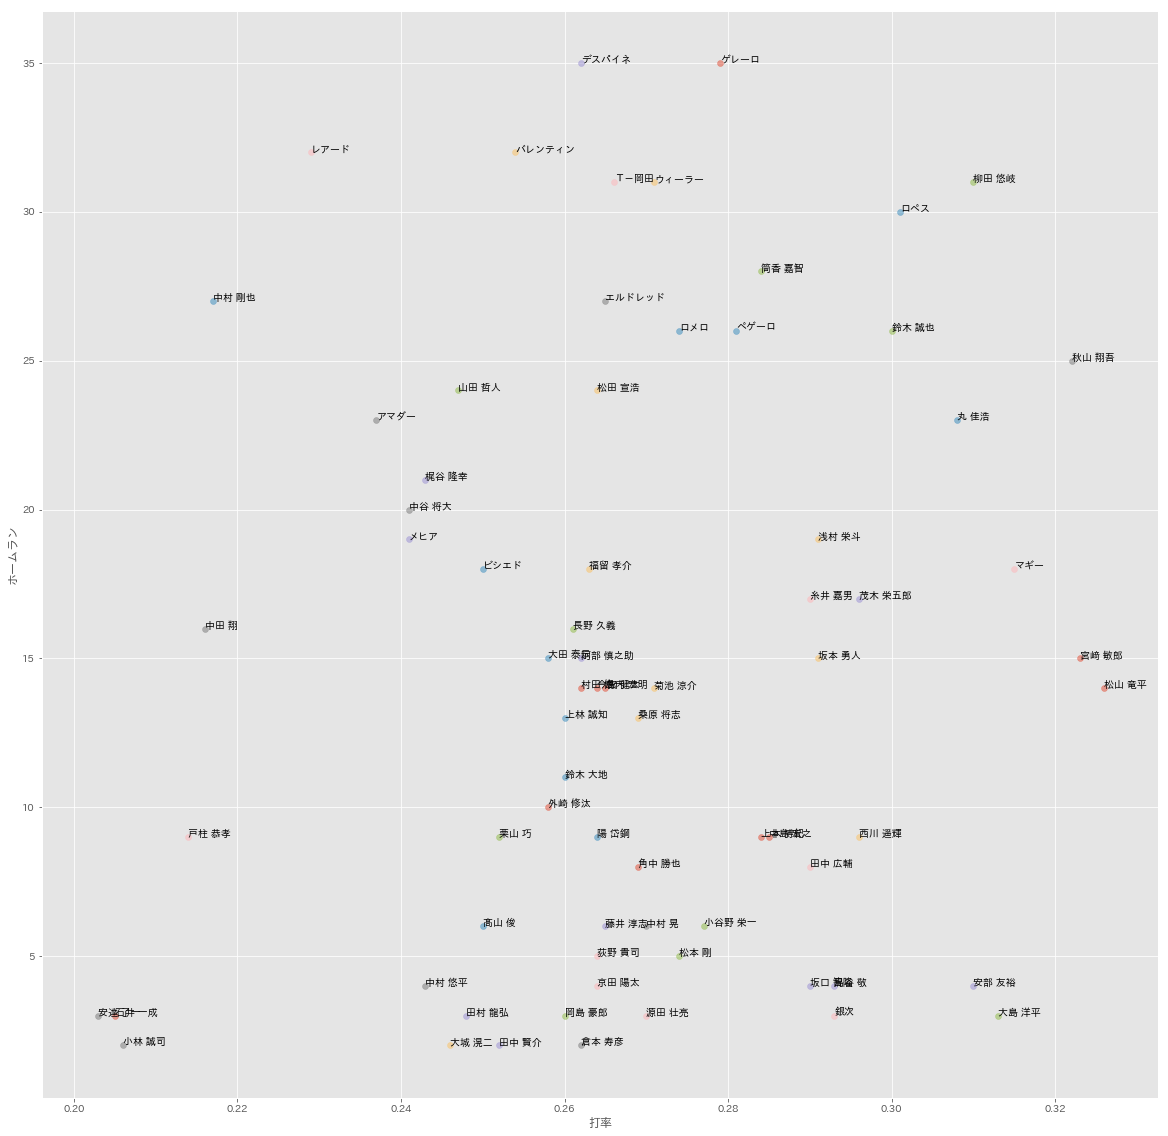

In [11]:
import pymysql
db = pymysql.connect(host=  '172.17.0.2',
                             user='baseball_user',
                             password='baseball_pass',
                             db='baseball_db',
                             charset='utf8',
                             cursorclass=pymysql.cursors.DictCursor)

from matplotlib import pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 20))

# プロットを1つ作成
ax = fig.add_subplot(111)
# ラベルをつける
ax.set_xlabel('打率')
ax.set_ylabel('ホームラン')
teamData = []

try:
    with db as cursor:
        sql = "SELECT * FROM batter where ab > 300"
        cursor.execute(sql)
 
        dbdata = cursor.fetchall()
        for rows in dbdata:
            teamData.append([rows['name'],rows['ba'],rows['hr']])
 
finally:
    db.close()
    
for row in teamData:
    ax.scatter(row[1],row[2],alpha=0.5)
    ax.annotate(row[0],xy=(row[1],row[2]),size=10)
